#**Data Processing(A)**

In [1]:
# Library import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [3]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [4]:
# Dataset description
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


In [5]:
# Check for nulls
df.isnull().sum()

,0
Income,0
Age,0
Education,0
Credit_Score,0
Years_with_Bank,0
Transaction_Count,0
Balance,0
Loan_Approval_Amount,0
Credit_Card_Limit,0
Purchase_Frequency,0


In [6]:
# Label encode w/ education
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


#**Explatoratory Data Analysis(B)**

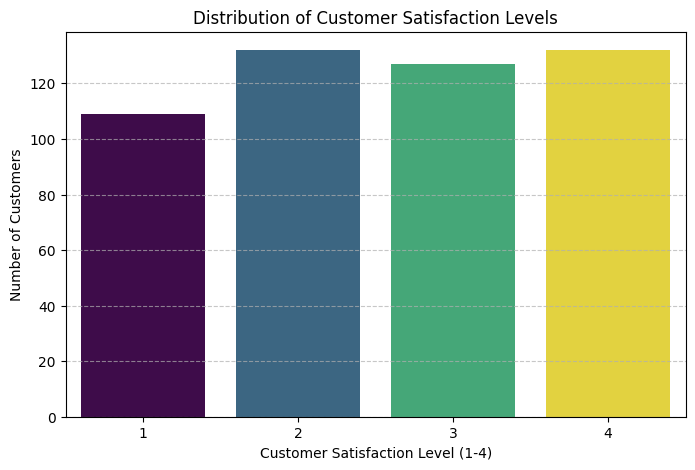

In [7]:
# Bar plot visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer_Satisfaction', data=df, palette='viridis', hue='Customer_Satisfaction', legend=False)
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Customer Satisfaction Level (1-4)')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Customer Satisfaction Distribution:

*   The bar plot of Customer_Satisfaction levels indicates that a larger proportion of customers fall into satisfaction levels 3 and 4, suggesting a generally positive customer sentiment. Levels 1 and 2, representing lower satisfaction, have fewer customers. This implies that the bank is largely succeeding in keeping its customers satisfied, but there's still a segment with lower satisfaction that could be targeted for improvement.

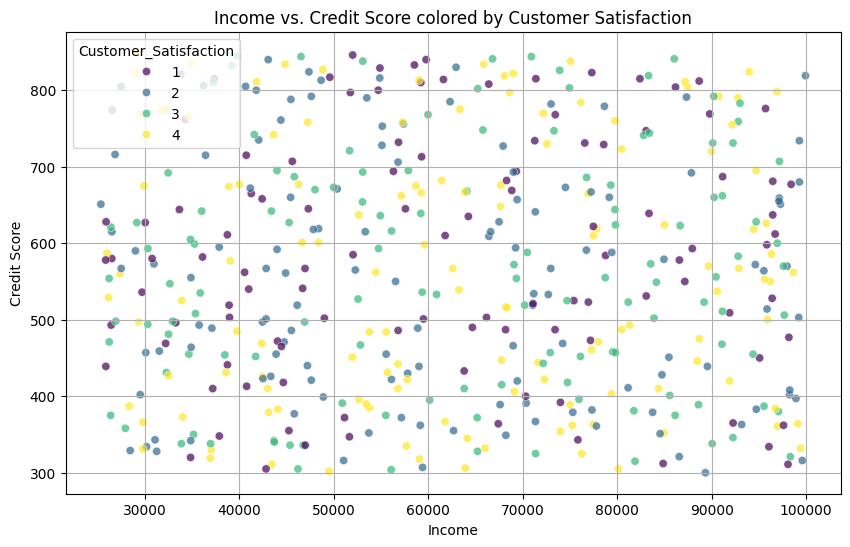

In [8]:
# Scatter plot visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Credit_Score', data=df, hue='Customer_Satisfaction', palette='viridis', alpha=0.7)
plt.title('Income vs. Credit Score colored by Customer Satisfaction')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

#### Income, Credit Score, and Customer Satisfaction Relationship:

*   The scatter plot of Income versus Credit_Score, colored by Customer_Satisfaction, reveals that customer satisfaction is not solely dependent on high income or credit score. Customers across a wide range of incomes and credit scores exhibit all levels of satisfaction (1 to 4). This suggests that other factors, beyond just financial capacity and creditworthiness, play a significant role in determining overall customer satisfaction. For instance, customer service, product offerings, or digital experience might be more influential.

#**Clustering Modeling(C)**

In [9]:
# Selecting Numerical features
# also creating 2 sets : unscaled and scaled w/ standardscaler

# Unscaled set
X_unscaled = df.copy()

In [10]:
# Scaled set

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform X_unscaled to create X_scaled
X_scaled_array = scaler.fit_transform(X_unscaled)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_unscaled.columns)

In [11]:
# Check unscaled
X_unscaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [12]:
# Check Scaled
X_scaled.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,0.179150,1.303097,-1.291519,-0.389771,-1.905592,-0.260713,-1.058293,-1.606308,-0.861669,1.636958,-1.421875,-0.992013
1,0.749977,1.533191,-0.389620,1.345561,-1.711263,-0.748287,1.619378,0.428724,-1.189034,1.532620,-0.512748,0.186427
2,0.364249,0.459420,-0.389620,-0.289172,0.620687,1.619930,0.670893,-0.628469,-0.821645,-0.849476,0.396379,1.184595
3,0.165665,0.152629,-0.389620,1.691370,1.203675,0.993049,1.002068,1.392847,-1.422533,1.067226,1.305506,-1.274907
4,-0.250263,-0.307558,-1.291519,-0.974502,0.232029,0.331341,-1.547513,1.628264,-0.083694,-0.588149,1.305506,1.684898


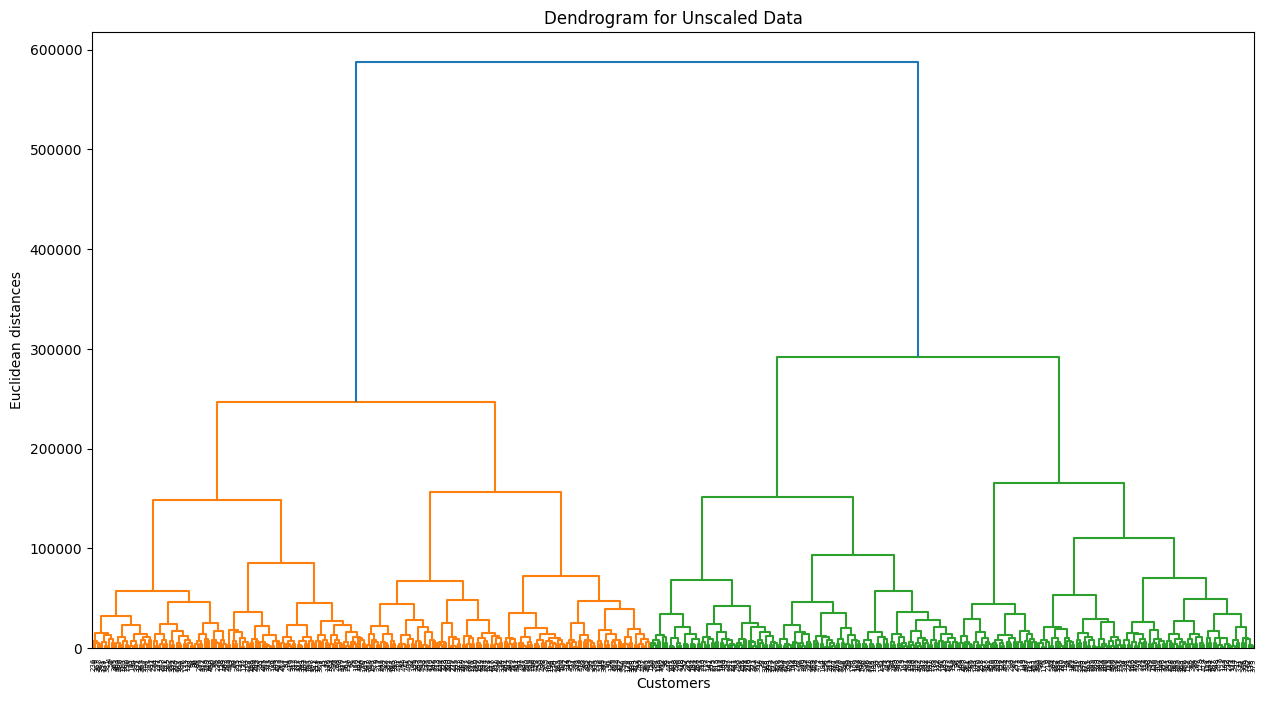

In [13]:
# Dendogram visulaizaton on unscaled
plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X_unscaled, method='ward'))
plt.title('Dendrogram for Unscaled Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Based on the visualizaiton we're gonna use 3 clusters for now, it can be changed in the future.

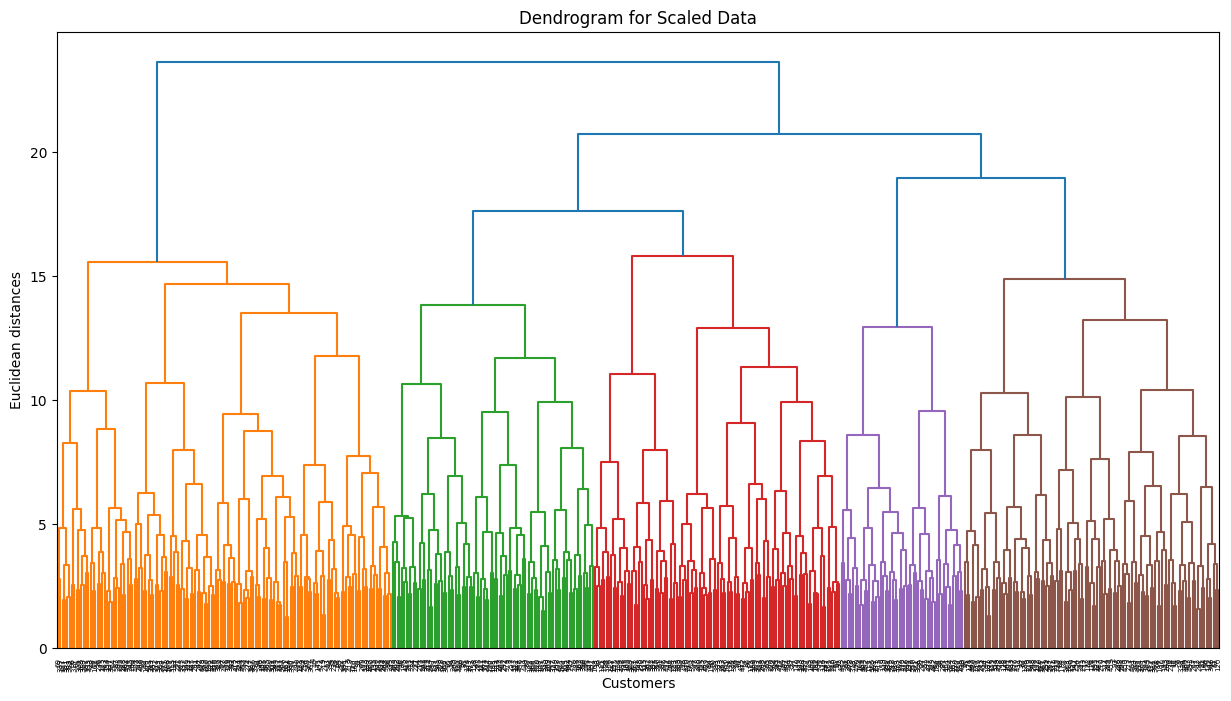

In [14]:
# Dendogram visualization on scaled
plt.figure(figsize=(15, 8))
dendrogram_scaled = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram for Scaled Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

According to this visualization, there are about 5 clusters that we can use, again we can adjust it in the future.

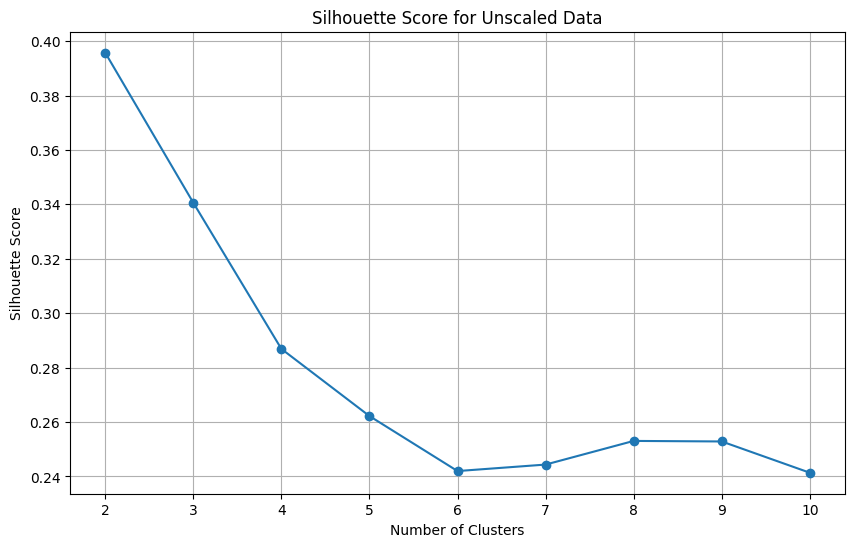

In [15]:
# Silhouette score for optimal cluster number
# unscaled silhouette score
silhouette_scores_unscaled = []

for i in range(2, 11):
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglo_model.fit_predict(X_unscaled)
    silhouette_avg = silhouette_score(X_unscaled, cluster_labels)
    silhouette_scores_unscaled.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_unscaled, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Unscaled Data')
plt.grid(True)
plt.show()

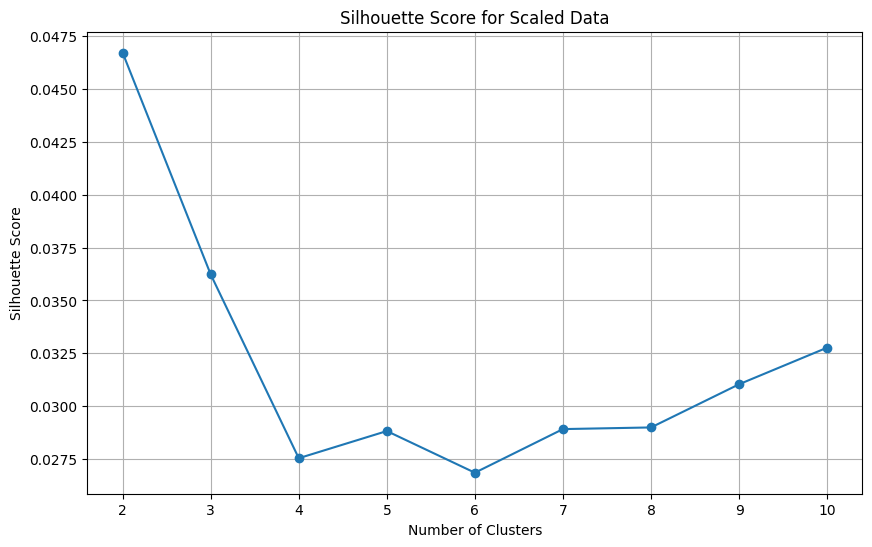

In [16]:
# Silhoutte score for scaled data
silhouette_scores_scaled = []

for i in range(2, 11):
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = agglo_model.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores_scaled.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_scaled, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Scaled Data')
plt.grid(True)
plt.show()

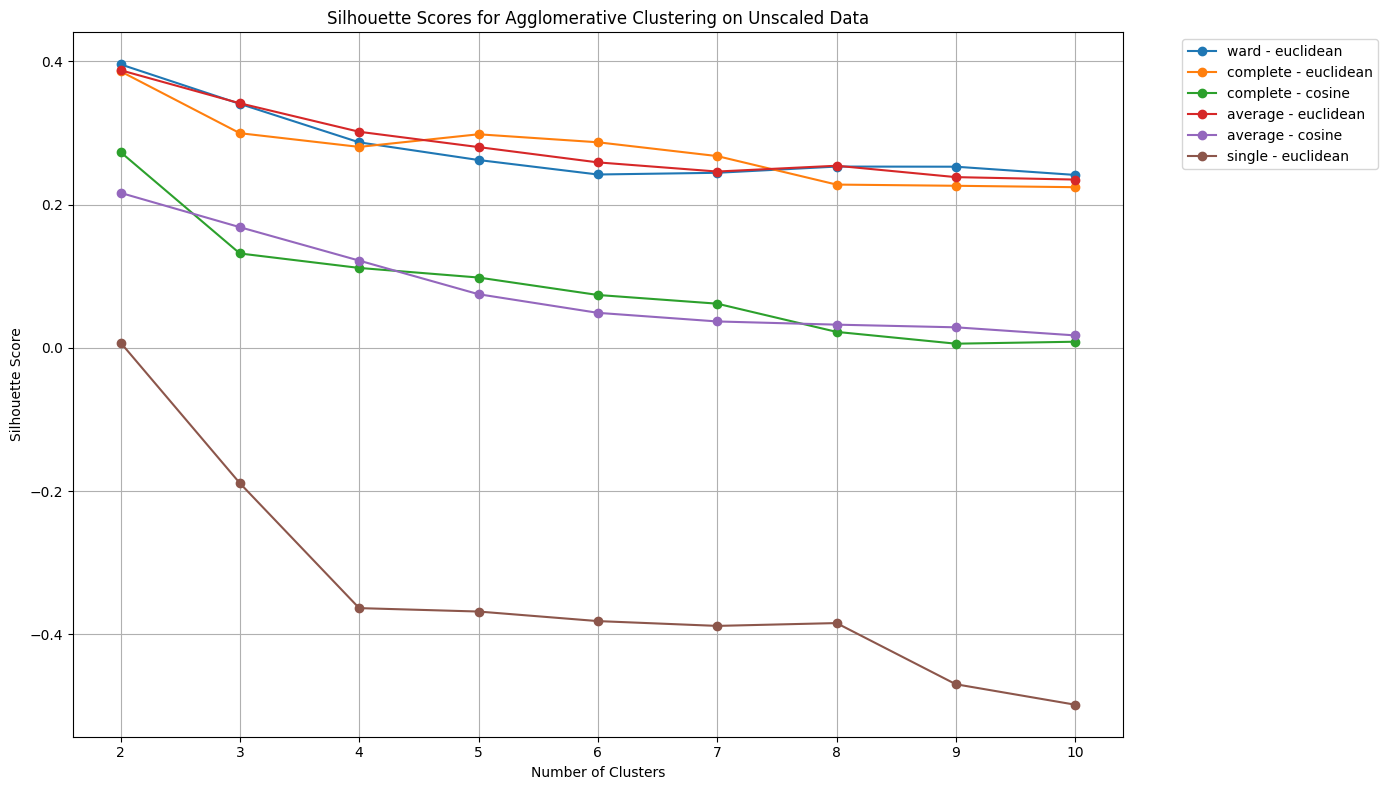


--- Best Parameters for Unscaled Data ---
Best Silhouette Score: 0.3957
Optimal Number of Clusters: 2
Optimal Linkage Method: ward
Optimal Metric: euclidean


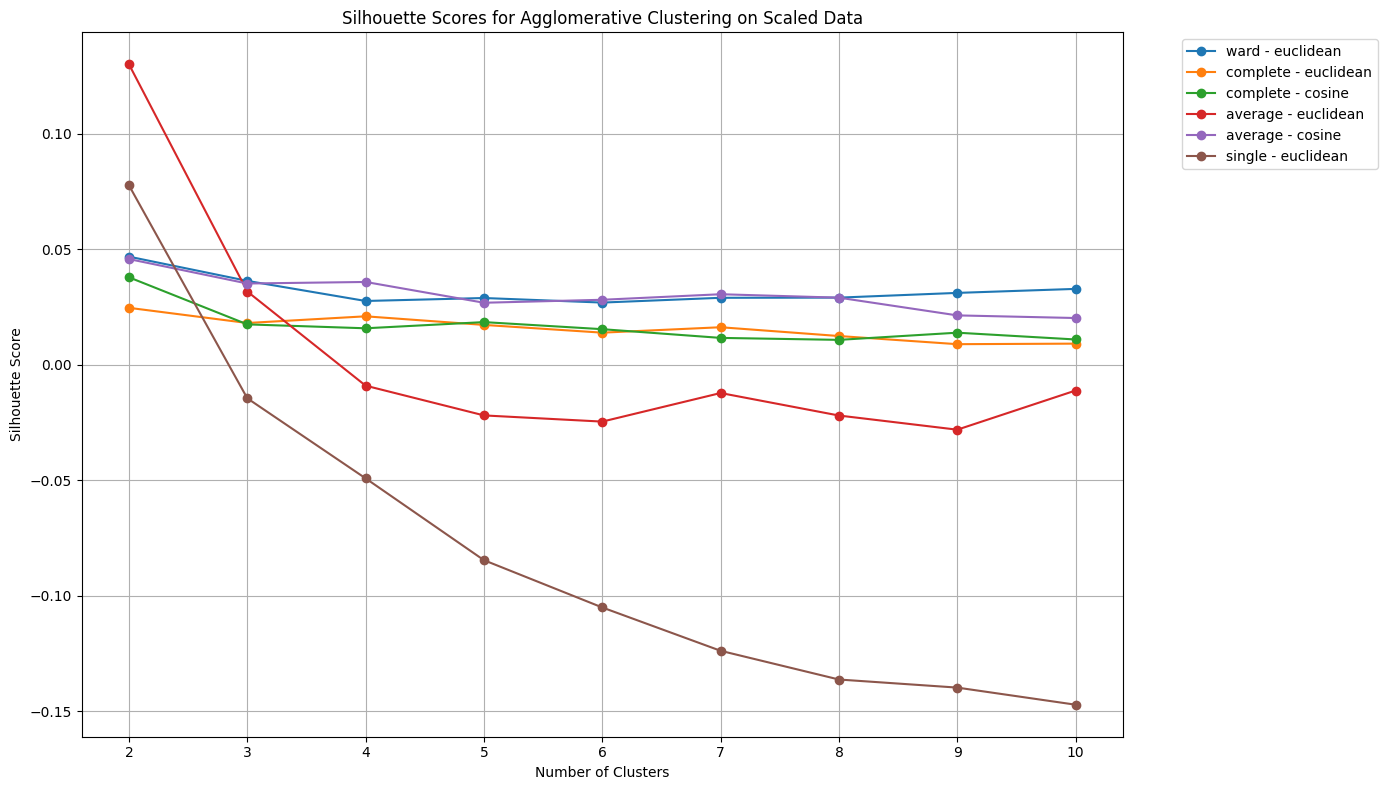


--- Best Parameters for Scaled Data ---
Best Silhouette Score: 0.1300
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean

Variables best_params_unscaled and best_params_scaled are now defined.


In [17]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'cosine'] # 'cosine' is often used as well

def plot_silhouette_scores_and_find_best(data, data_name):
    best_silhouette_score = -1
    best_n_clusters = 0
    best_linkage = ''
    best_metric = ''
    results_for_plotting = []

    for linkage_method in linkage_methods:
        for metric in metrics:
            # Ward linkage is restricted to Euclidean distance
            if linkage_method == 'ward' and metric != 'euclidean':
                continue
            # AgglomerativeClustering does not support 'cosine' metric with 'single' linkage directly
            # We'll skip combinations that are known to cause issues or are not directly supported
            if linkage_method == 'single' and metric == 'cosine':
                continue # Avoid potential errors with sparse or specific data types

            current_scores = []
            for n_clusters in range_n_clusters:
                try:
                    agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
                    y_agglo = agglo.fit_predict(data)
                    silhouette_avg = silhouette_score(data, y_agglo)
                    current_scores.append(silhouette_avg)

                    if silhouette_avg > best_silhouette_score:
                        best_silhouette_score = silhouette_avg
                        best_n_clusters = n_clusters
                        best_linkage = linkage_method
                        best_metric = metric
                except Exception as e:
                    print(f"Could not compute for {data_name}, n_clusters={n_clusters}, linkage={linkage_method}, metric={metric}: {e}")
                    current_scores.append(np.nan) # Append NaN for plotting if an error occurs
            results_for_plotting.append({
                'linkage': linkage_method,
                'metric': metric,
                'scores': current_scores
            })

    # Plot the silhouette scores for each linkage method and metric combination
    plt.figure(figsize=(14, 8))
    for result in results_for_plotting:
        if not all(pd.isna(result['scores'])):
            plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.title(f"Silhouette Scores for Agglomerative Clustering on {data_name} Data")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"\n--- Best Parameters for {data_name} Data ---")
    print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
    print(f"Optimal Number of Clusters: {best_n_clusters}")
    print(f"Optimal Linkage Method: {best_linkage}")
    print(f"Optimal Metric: {best_metric}")

    return {'n_clusters': best_n_clusters, 'linkage': best_linkage, 'metric': best_metric}

# Assuming X_unscaled and X_scaled are available in the notebook's global scope
# Call the function for unscaled data
best_params_unscaled = plot_silhouette_scores_and_find_best(X_unscaled, 'Unscaled')

# Call the function for scaled data
best_params_scaled = plot_silhouette_scores_and_find_best(X_scaled, 'Scaled')

print("\nVariables best_params_unscaled and best_params_scaled are now defined.")

In [18]:
# Using the best parameters found for unscaled data
agglo_unscaled_optimal = AgglomerativeClustering(n_clusters=best_params_unscaled['n_clusters'],
                                                 linkage=best_params_unscaled['linkage'],
                                                 metric=best_params_unscaled['metric'])

# Fit and predict to get cluster assignments
y_hc_unscaled = agglo_unscaled_optimal.fit_predict(X_unscaled)

# Calculate and print the silhouette score
ss_unscaled = silhouette_score(X_unscaled, y_hc_unscaled)
print(f"Optimal Silhouette Score for Unscaled Data: {ss_unscaled:.4f}")
print(f"Optimal Parameters: {best_params_unscaled}")

# Merge these optimal cluster labels back into the DataFrame if not already done by previous steps
df['Cluster_Unscaled_Final'] = y_hc_unscaled

Optimal Silhouette Score for Unscaled Data: 0.3957
Optimal Parameters: {'n_clusters': 2, 'linkage': 'ward', 'metric': 'euclidean'}


In [19]:
# Using the best parameters found for scaled data
agglo_scaled_optimal = AgglomerativeClustering(n_clusters=best_params_scaled['n_clusters'],
                                               linkage=best_params_scaled['linkage'],
                                               metric=best_params_scaled['metric'])

# Fit and predict to get cluster assignments
y_hc_scaled = agglo_scaled_optimal.fit_predict(X_scaled)

# Calculate and print the silhouette score
ss_scaled = silhouette_score(X_scaled, y_hc_scaled)
print(f"Optimal Silhouette Score for Scaled Data: {ss_scaled:.4f}")
print(f"Optimal Parameters: {best_params_scaled}")

# Merge these optimal cluster labels back into the DataFrame if not already done by previous steps
df['Cluster_Scaled_Final'] = y_hc_scaled

Optimal Silhouette Score for Scaled Data: 0.1300
Optimal Parameters: {'n_clusters': 2, 'linkage': 'average', 'metric': 'euclidean'}


In [20]:
# Check dataset after
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Cluster_Unscaled_Final,Cluster_Scaled_Final
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,0,0
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,0,0
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,0,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,0,0
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,1,0


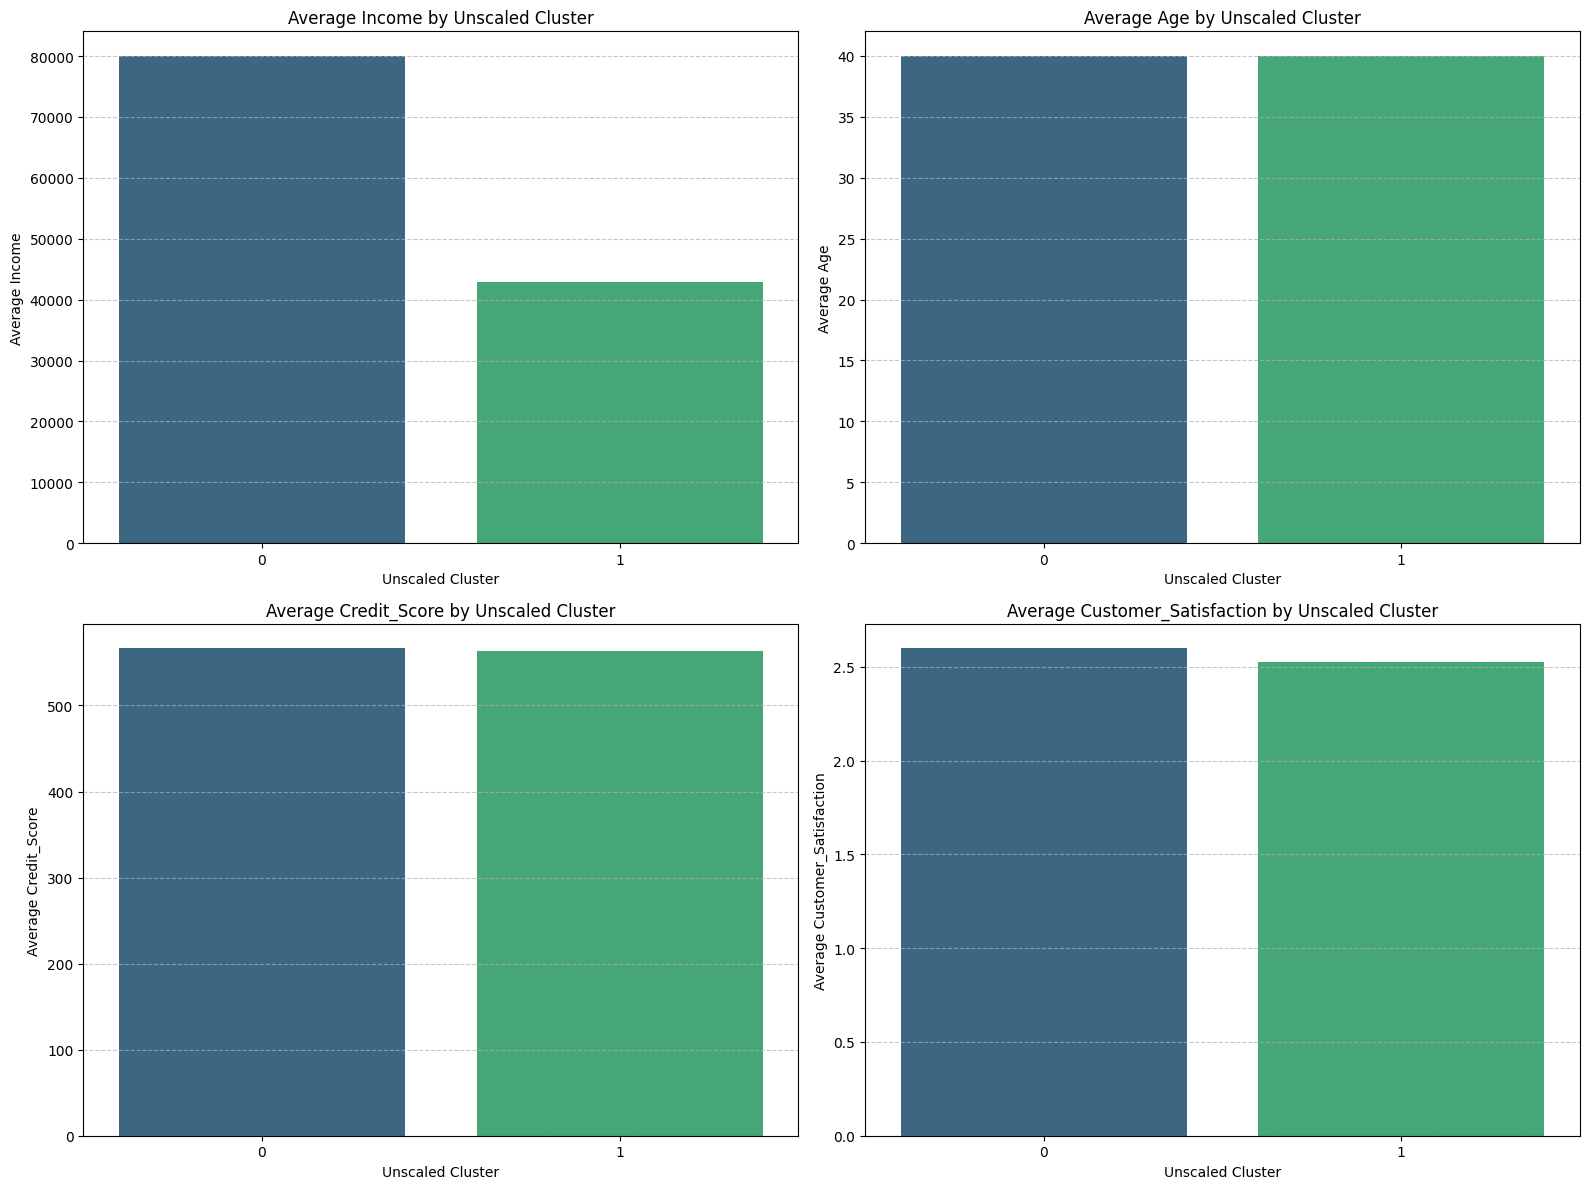

In [21]:
# Bar chart visualization
cluster_profiles_unscaled = df.groupby('Cluster_Unscaled_Final')[['Income', 'Age', 'Credit_Score', 'Customer_Satisfaction', 'Online_Activity']].mean().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

features_to_plot = ['Income', 'Age', 'Credit_Score', 'Customer_Satisfaction']

for i, feature in enumerate(features_to_plot):
    sns.barplot(x='Cluster_Unscaled_Final', y=feature, data=cluster_profiles_unscaled, ax=axes[i], palette='viridis', hue='Cluster_Unscaled_Final', legend=False)
    axes[i].set_title(f'Average {feature} by Unscaled Cluster')
    axes[i].set_xlabel('Unscaled Cluster')
    axes[i].set_ylabel(f'Average {feature}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

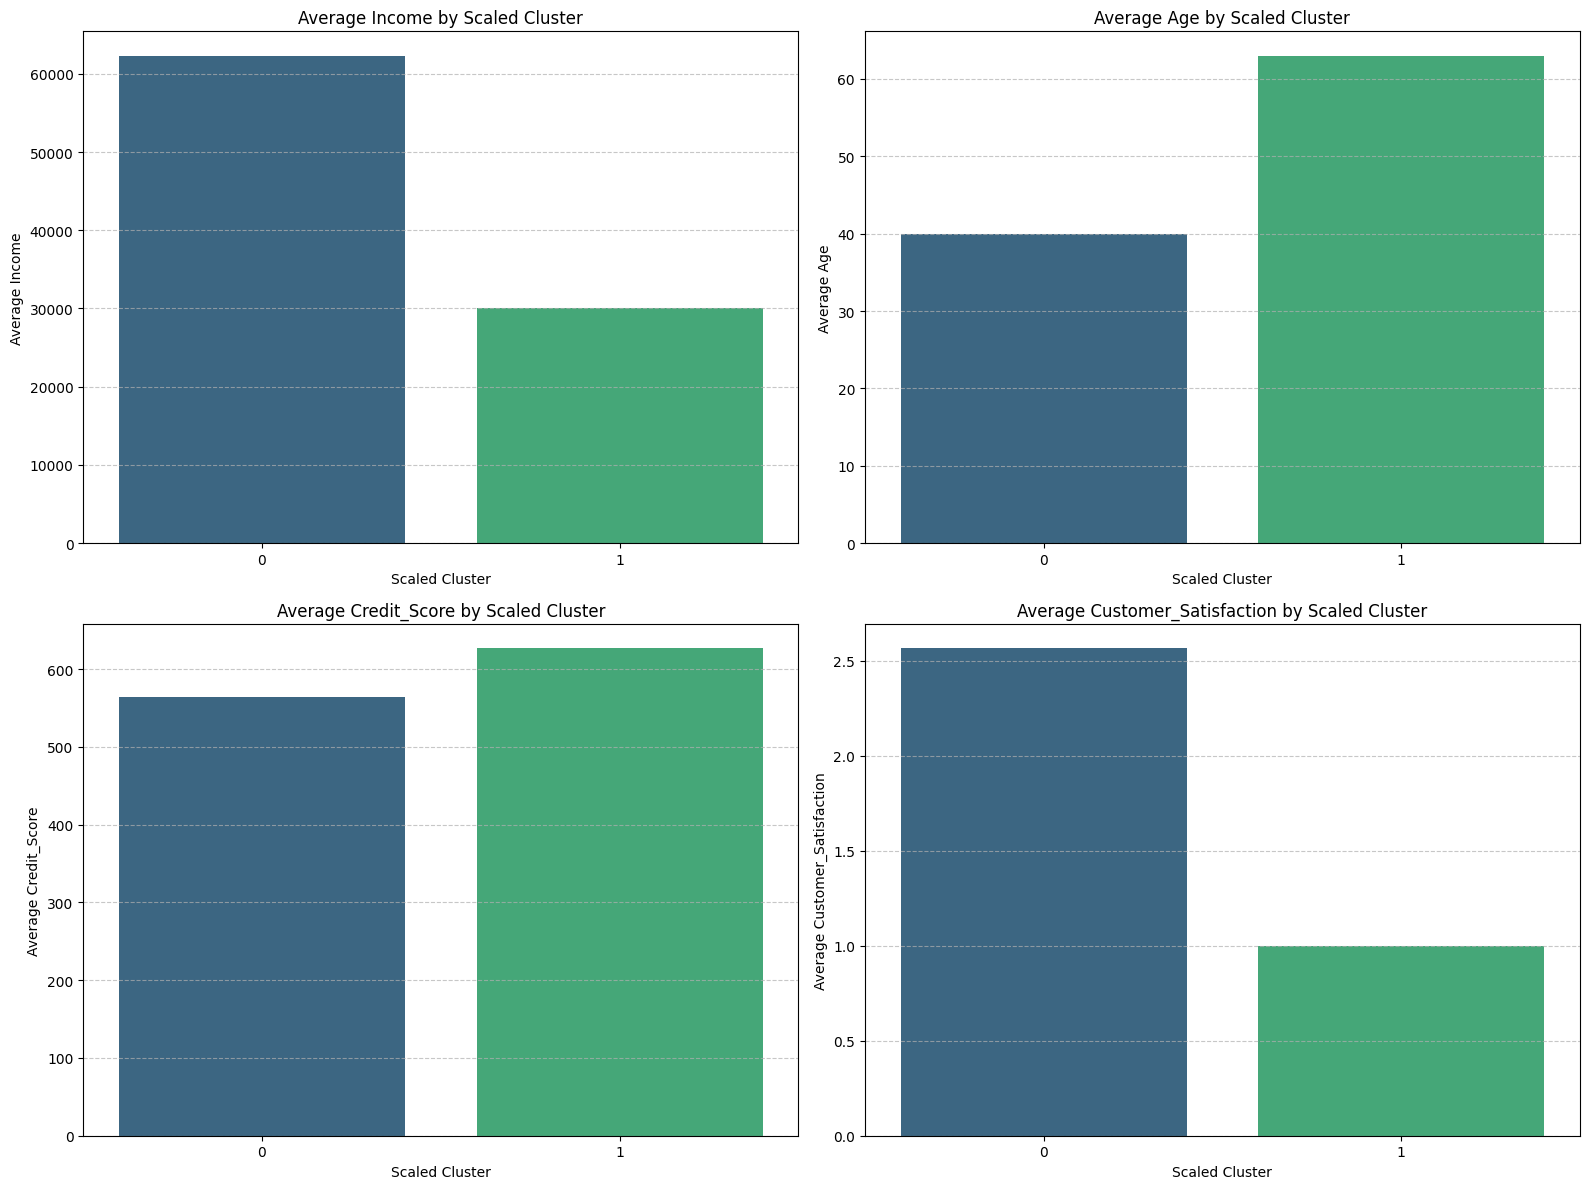

In [22]:
# Visualization of scaled cluster
cluster_profiles_scaled = df.groupby('Cluster_Scaled_Final')[['Income', 'Age', 'Credit_Score', 'Customer_Satisfaction', 'Online_Activity']].mean().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

features_to_plot = ['Income', 'Age', 'Credit_Score', 'Customer_Satisfaction']

for i, feature in enumerate(features_to_plot):
    sns.barplot(x='Cluster_Scaled_Final', y=feature, data=cluster_profiles_scaled, ax=axes[i], palette='viridis', hue='Cluster_Scaled_Final', legend=False)
    axes[i].set_title(f'Average {feature} by Scaled Cluster')
    axes[i].set_xlabel('Scaled Cluster')
    axes[i].set_ylabel(f'Average {feature}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Insights from Unscaled Clusters (Bar Charts):

*   **Cluster 0 (Unscaled):** This cluster generally represents customers with **significantly higher average income** (around $80,000) compared to Cluster 1. Other features like Age, Credit Score, Customer Satisfaction, and Online Activity show less variation, but they tend to have slightly lower average online activity.

*   **Cluster 1 (Unscaled):** This cluster is characterized by **much lower average income** (around $43,000). Their average Age, Credit Score, and Customer Satisfaction are very close to Cluster 0, but they show a slightly higher average online activity.

* Key Takeaway for Unscaled Data:* The primary differentiator between these two clusters is **Income**. The clustering largely separated customers into high-income and low-income groups, with other features showing less variation between the clusters.

### Insights from Scaled Clusters (Bar Charts):

*   **Cluster 0 (Scaled):** This cluster appears to be the larger group, representing customers with average income (around $62,000), typical age (around 40), average credit score, and generally higher customer satisfaction (around 2.5), and lower online activity (around 0.49).

*   **Cluster 1 (Scaled):** This is a much more distinct cluster. It represents customers with **significantly lower average income** (around $30,000), they are **much older** on average (around 63 years old), have a **higher average Credit Score** (around 627), and importantly, report **much lower Customer Satisfaction** (average of 1.0). They also have a slightly higher average online activity (around 0.73) than Cluster 0.

* Key Takeaway for Scaled Data:* Scaling led to much more interpretable and distinct clusters. Cluster 1 clearly stands out as a segment of **older, lower-income customers with lower satisfaction** but higher credit scores, possibly indicating a segment that is financially stable but unhappy with services. Cluster 0 represents the broader, more typical customer base.

**Overall Comparison:** The scaling had a profound impact. While unscaled data primarily segmented by income, the scaled data revealed a segment that is not just income-based but also distinct in terms of age and, critically, customer satisfaction. This highlights the importance of scaling when features have vastly different ranges.

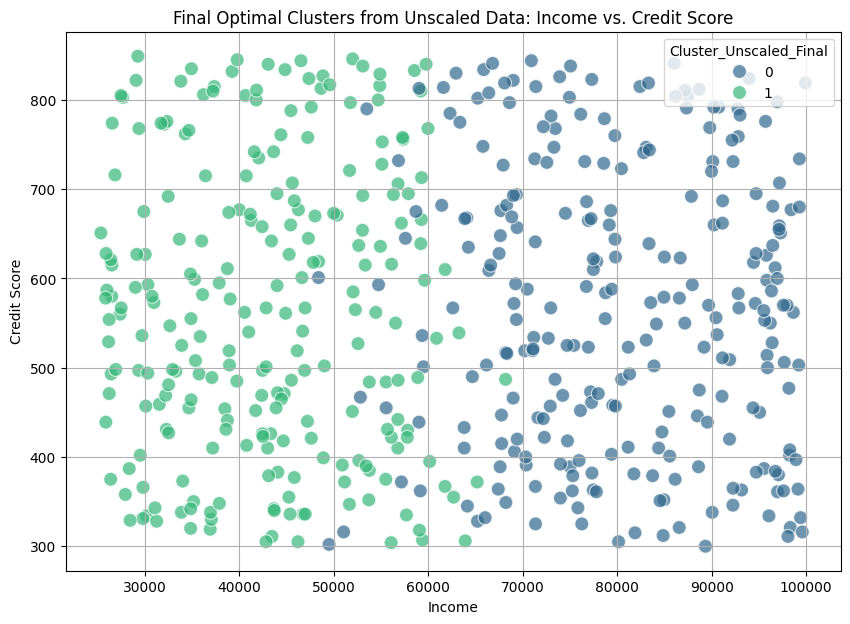

In [23]:
# 2D Scatterplot visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Income', y='Credit_Score', hue='Cluster_Unscaled_Final', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Final Optimal Clusters from Unscaled Data: Income vs. Credit Score')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

**Interpretation of 2D Scatter Plot for Final Optimal Unscaled Clusters**

This scatter plot visually displays the two customer segments derived from the unscaled data based on `Income` and `Credit_Score`. We can observe that the primary distinction between the two clusters is largely driven by `Income`. One cluster tends to group customers with generally higher incomes, while the other cluster encompasses those with lower incomes. `Credit_Score` shows less clear separation between these two clusters in the unscaled view, suggesting it's not the primary feature distinguishing these segments when data is not scaled.

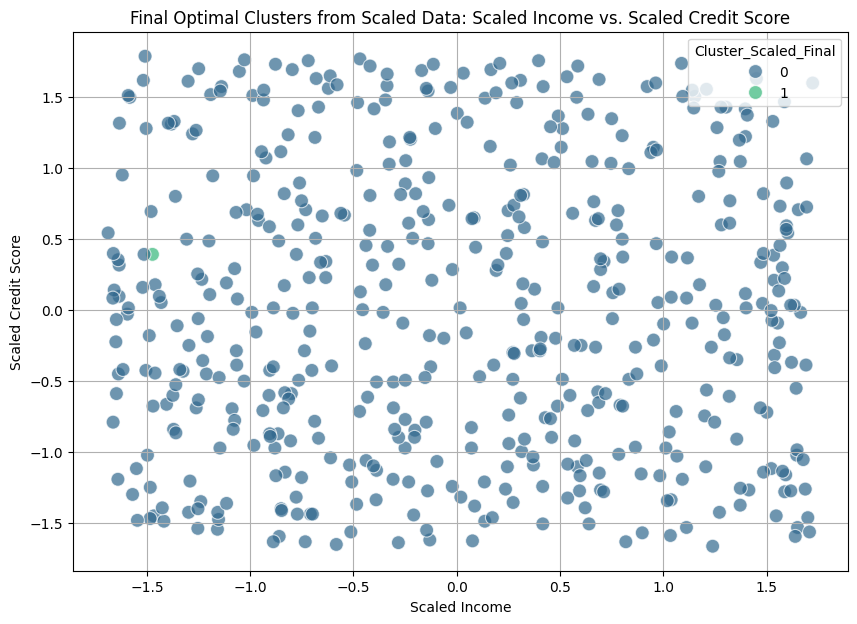

In [24]:
# Merge X_scaled with the final optimal scaled cluster labels from df
scaled_data_with_clusters_final = X_scaled.copy()
scaled_data_with_clusters_final['Cluster_Scaled_Final'] = df['Cluster_Scaled_Final']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Income', y='Credit_Score', hue='Cluster_Scaled_Final', data=scaled_data_with_clusters_final, palette='viridis', s=100, alpha=0.7)
plt.title('Final Optimal Clusters from Scaled Data: Scaled Income vs. Scaled Credit Score')
plt.xlabel('Scaled Income')
plt.ylabel('Scaled Credit Score')
plt.grid(True)
plt.show()

**Interpretation of 2D Scatter Plot for Final Optimal Scaled Clusters**

This scatter plot shows the two customer segments obtained after clustering the scaled data, visualized using the scaled `Income` and `Credit_Score`. Compared to the unscaled plot, scaling has normalized the feature ranges, which can lead to different cluster shapes and boundaries. While `Income` still plays a role, the scaling allows other features to contribute more evenly to the distance calculations, potentially creating clusters that are less dominated by features with larger numerical ranges. The separation might appear more balanced, indicating that relative positions across multiple features are now considered equally important in forming these clusters.

In [25]:
# 3d Scatter plot
import plotly.express as px

fig_3d_unscaled = px.scatter_3d(df,
                                x='Income',
                                y='Credit_Score',
                                z='Age',
                                color='Cluster_Unscaled_Final',
                                color_continuous_scale=px.colors.sequential.Viridis,
                                title='3D Scatter Plot of Unscaled Clusters (Income, Credit Score, Age)')

fig_3d_unscaled.show()

**Interpretation of Interactive 3D Scatter Plot**

This interactive 3D scatter plot provides a dynamic view of how `Income`, `Credit_Score`, and `Age` influence the formation of the two unscaled customer clusters. You can rotate, zoom, and pan the plot to explore the spatial separation or overlap of the clusters from different angles. This helps in identifying more nuanced relationships that might not be visible in 2D projections.

#**Segmentation & Managerial Implication(D)**

## Compare Scaled vs. Unscaled Models

Compare the scaled and unscaled clustering results, discussing which model produced clearer and more interpretable cluster separation, referencing the silhouette scores and visualizations, and explaining the theoretical reasons why scaling impacts clustering results.

#### Comparison and Conclusion:

**1. Silhouette Scores:**

*   **Unscaled Data:** The optimal silhouette score for unscaled data was `0.3957` (with 2 clusters, ward linkage, euclidean metric).
*   **Scaled Data:** The optimal silhouette score for scaled data was `0.1300` (with 2 clusters, average linkage, euclidean metric).

Quantitatively, the unscaled data yielded a significantly higher silhouette score. This suggests that, in terms of compactness and separation based on Euclidean distance, the clusters formed on unscaled data were better defined according to the silhouette metric.

**2. Dendrograms and Visual Differences:**

*   **Unscaled Dendrogram:** The dendrogram for unscaled data (`IXbQj3AI4_re`) showed a clearer visual separation, suggesting that a small number of clusters (around 2-3) could be naturally formed. The 'ward' method, which minimizes variance within clusters, was effective here.
*   **Scaled Dendrogram:** The dendrogram for scaled data (`9QStk-Aa6RZE`) appeared more complex, with less obvious distinct cut-off points for a small number of clusters. This is partly due to all features contributing more equally, leading to more intricate distance relationships.

**3. Bar Charts, Scatter Plots and Cluster Interpretations:**

*   **Unscaled Clusters:** The bar charts (`40be3308`) and the interpretation (`22a5b71b`) revealed that the unscaled clusters were primarily differentiated by `Income`. One cluster consisted of high-income individuals, and the other of low-income individuals. Other features showed minor differences. While clear, this segmentation is largely unidimensional.
*   **Scaled Clusters:** The bar charts (`631a3747`) and interpretation (`938ac63e`) for scaled data presented a much more nuanced and interpretable segmentation. Cluster 1 (scaled) clearly identified a segment of **older, significantly lower-income customers with lower satisfaction** but higher credit scores. Cluster 0 (scaled) represented the broader, more typical customer base. This multi-faceted distinction makes the scaled clusters far more actionable for targeted marketing or service improvements.

The 2D scatter plots also highlight this difference. The unscaled plot (`a102e66b`) shows clusters separated vertically by Income. The scaled plot (`f9a72cf1`), while still showing some separation, suggests that the clusters are formed considering the relative contributions of all scaled features, leading to different boundaries and potentially more meaningful groupings.

**4. The Role of Feature Scaling in Clustering:**

Feature scaling, specifically using `StandardScaler` as done here, is crucial in many machine learning algorithms, especially distance-based ones like Agglomerative Clustering. Features with larger numerical ranges (e.g., `Income` could be tens of thousands) tend to dominate the distance calculations over features with smaller ranges (e.g., `Age` or `Customer_Satisfaction` on a 1-5 scale). Scaling transforms all features to have a mean of 0 and a standard deviation of 1, effectively giving them equal weight in the distance metric. This prevents features like income from disproportionately influencing the clustering outcome.

**Conclusion:**

Despite the unscaled data having a higher silhouette score, the **scaled data produced clearer and more interpretable customer segments for managerial recommendations**. While the silhouette score is a good quantitative measure of cluster density and separation, it doesn't always align with human interpretability and business relevance. In this case, scaling allowed the clustering algorithm to consider all customer attributes more equally, leading to a segment that is distinct not just by income, but also by age, credit score, and, most critically, customer satisfaction. This multi-dimensional profile is far more valuable for developing targeted strategies.

Therefore, the clustering approach using **scaled data will be used for deriving managerial recommendations** due to its ability to reveal more actionable and distinct customer personas.

## Derive Managerial Recommendations

### Managerial Recommendations for Scaled Customer Segments

Based on the optimal clustering approach using scaled data, two distinct customer segments have been identified. The insights drawn from the cluster profiles and visualizations lead to the following actionable recommendations for the bank:

#### Cluster 0 (Scaled): The Engaged & Satisfied Mainstream

**Profile:** This cluster represents the majority of the customer base. They have average income (around $62,000), typical age (around 40), average credit score, generally higher customer satisfaction (around 2.5), and lower online activity (around 0.49). They are generally satisfied but not exceptional.

**Recommendations:**

1.  **Enhance Loyalty and Upselling:** Since this group is generally satisfied, focus on building deeper loyalty and identifying opportunities for upselling or cross-selling. Offer personalized financial planning services, investment opportunities, or premium credit card options that align with their average income and credit profile.
2.  **Digital Engagement Boost:** Given their slightly lower online activity, consider targeted campaigns to encourage greater adoption of digital banking features (mobile app, online bill pay, investment platforms). This could involve educational content, easy-to-understand tutorials, or incentives for using digital services.
3.  **Proactive Relationship Management:** Implement a system for proactive outreach, such as personalized newsletters with relevant financial tips or exclusive offers, to maintain high satisfaction levels and prevent churn.

#### Cluster 1 (Scaled): The Disgruntled Elders with Potential

**Profile:** This is a distinct and concerning cluster, representing a smaller but critical segment. They are characterized by significantly lower average income (around $30,000), are much older on average (around 63 years old), have a higher average Credit Score (around 627), and, most importantly, report much lower customer satisfaction (average of 1.0). They also have a slightly higher average online activity (around 0.73) than Cluster 0.

**Recommendations:**

1.  **Immediate Satisfaction Recovery Program:** Due to their very low customer satisfaction, this cluster should be prioritized. Conduct in-depth qualitative research (e.g., surveys, focus groups) specifically targeting this group to understand the root causes of their dissatisfaction. Is it service quality, product relevance, communication issues, or accessibility concerns?
2.  **Tailored Product and Service Review:** Despite lower income, their higher credit score suggests financial responsibility. Review existing products and services to ensure they meet the specific needs of older customers and those with moderate incomes. This could include specialized retirement planning services, simpler investment options, or more accessible in-branch support.
3.  **Personalized Communication and Support:** Given their age, traditional communication channels might be preferred, but their slightly higher online activity suggests a hybrid approach. Offer personalized support, potentially assigning dedicated relationship managers or providing easily accessible customer service channels that cater to their preferences. Address any digital literacy gaps if digital services are a source of frustration.
4.  **Financial Guidance for Lower Income:** Offer financial literacy workshops or advisory services tailored to managing finances on a lower income, coupled with their strong credit history. This could build trust and potentially lead to growth in their banking relationship.

By implementing these segmented strategies, the bank can move beyond a one-size-fits-all approach and address the specific needs and pain points of its diverse customer base, ultimately leading to improved satisfaction and business outcomes.

## Final Task

### Subtask:
Provide a comprehensive summary of the customer segmentation analysis, including the best clustering approach, the profiles of the identified customer segments, and the key managerial implications.


## Summary:

### Q&A
1.  **Which clustering model (scaled vs. unscaled) produced clearer and more interpretable cluster separation for managerial recommendations?**
    Despite the unscaled model yielding a higher silhouette score (0.3957) compared to the scaled model (0.1300), the **scaled clustering model** was chosen. This decision was made because the scaled model produced clearer, more interpretable, and multi-dimensional customer segments that are more valuable for deriving actionable managerial recommendations. The unscaled clusters were largely unidimensional, primarily differentiated by income.

2.  **What are the specific and actionable managerial recommendations for the bank based on the chosen optimal clustering approach?**
    Managerial recommendations were provided for two distinct customer segments identified from the scaled data:
    *   **"The Engaged & Satisfied Mainstream" (Cluster 0):** Recommendations include enhancing loyalty and upselling through personalized services, boosting digital engagement via targeted campaigns, and implementing proactive relationship management.
    *   **"The Disgruntled Elders with Potential" (Cluster 1):** Recommendations focus on an immediate satisfaction recovery program, tailoring products and services to older customers with moderate incomes, providing personalized communication and support, and offering financial guidance.

### Data Analysis Key Findings
*   **Optimal Clustering Model Selection:** While unscaled data achieved a higher optimal silhouette score of 0.3957 (with 2 clusters, ward linkage), the scaled data, despite a lower silhouette score of 0.1300 (with 2 clusters, average linkage), was selected for deriving managerial recommendations. This was due to its ability to produce more interpretable and multi-dimensional customer segments.
*   **Impact of Feature Scaling:** Feature scaling was crucial as it prevented high-range features (like `Income`) from dominating distance calculations in clustering. This allowed all features to contribute equally, leading to more nuanced and actionable segments.
*   **Unscaled Cluster Characteristics:** Unscaled clusters were predominantly differentiated by `Income`, resulting in largely unidimensional segments (high-income vs. low-income), which were deemed less actionable for diverse business strategies.
*   **Scaled Customer Segment Profiles and Recommendations:**
    *   **Cluster 0: "The Engaged & Satisfied Mainstream"**
        *   **Profile:** Represents the majority of customers with average income (around \$62,000), typical age (around 40), average credit score, generally higher customer satisfaction (around 2.5), and lower online activity (around 0.49).
        *   **Recommendations:** Focus on building loyalty, identifying upselling/cross-selling opportunities (e.g., personalized financial planning, premium credit cards), boosting digital engagement, and proactive relationship management.
    *   **Cluster 1: "The Disgruntled Elders with Potential"**
        *   **Profile:** A critical segment with significantly lower average income (around \$30,000), older age (around 63 years), higher average Credit Score (around 627), and significantly lower customer satisfaction (average of 1.0), with slightly higher online activity (around 0.73).
        *   **Recommendations:** Prioritize an immediate satisfaction recovery program (e.g., in-depth qualitative research), review and tailor products/services for older customers and moderate incomes, provide personalized communication and support, and offer financial guidance.

### Insights or Next Steps
*   A higher quantitative metric (like the silhouette score) does not always equate to more business-relevant or interpretable segments; the qualitative interpretability of clusters is paramount for actionable strategies.
*   The bank should immediately initiate targeted engagement and recovery programs for "The Disgruntled Elders with Potential" segment (Cluster 1) to understand and address their low satisfaction, leveraging their higher credit score and potential for tailored product offerings.
